# Multiple Regression

**Importing Libraries**

In [13]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

### Multiple Regression and Car Crash Dataset

when looking at the summery of OLS we see that the addition of the speeding feature did not add much and given the p-value has us fail to

reject the original null hypothosis of that there is NO relationship between total accidents and speeding.

When looking at the R2 value we actually see a small decrease meaning that the additional feature added very little to the explenation of varience.

in this example we should consider not using speeding as a valid way to explain the relationship because errors in the data could negativly effect our result

and there is little relationship between total crashes and speeding

In [7]:
# Load the car crash dataset
df = sns.load_dataset("car_crashes")

df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
# Set-up and fit the model in one step
# (format Y ~ X1 + X2)
model = ols('total ~ alcohol + speeding', data=crashes).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.27e-14
Time:                        12:46:48   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0

### Using Multiple Variables to Increase our Ability to Predict Total Crashes

**Setting up baseline score with total crashes and alcohol**

In [12]:
model = ols('total ~ alcohol', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.04e-15
Time:                        12:58:59   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8578      0.921      6.357      0.0

**R-squared**
Now we're going to look at a new result in our model summary: R-squared. This term is a statistical measure representing the proportion of the

variance for a dependent variable explained by an independent variable (or variables) in a regression model. For our data, the R-squared value is 
 
the proportion of the variance for our variable total explained by our independent variable, alcohol.

- we have an R-squared value of 0.727 or 73% (this is a proportion to express it as a percent). So 73% of the variance in total accidents is explained by alcohol impairment

- Increasing our R2 value will increase our ability to explain the variance 

**Multiple Linear Regression**
- adding the no_previous feature to our regression model

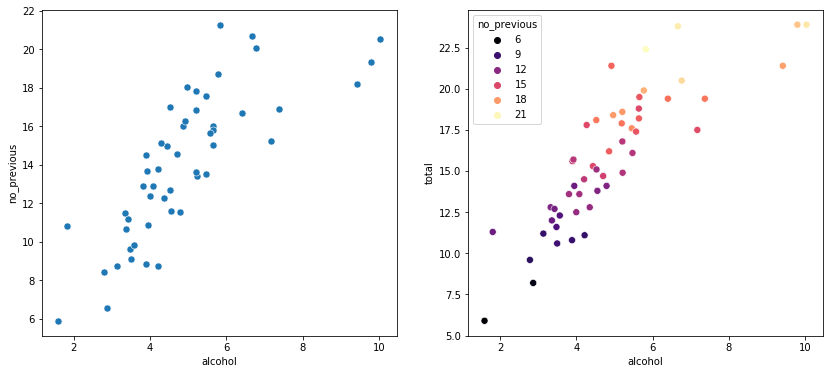

In [22]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

# Compare the two independent variables to each other - are they related?
sns.scatterplot(x='alcohol', y='no_previous', data=df, s=50, ax=ax1)
# The color no represents the percentage of speeding drivers
sns.scatterplot(x='alcohol', y='total', hue='no_previous', data=df, s=50, palette='magma', ax=ax2);

plt.show()

**We see that with the additonal feature our R2 value went from 73% to 94%!**

In [23]:
# Set-up and fit the model in one step
# (format Y ~ X1 + X2)
model = ols('total ~ alcohol + no_previous', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     389.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.11e-30
Time:                        13:12:26   Log-Likelihood:                -71.494
No. Observations:                  51   AIC:                             149.0
Df Residuals:                      48   BIC:                             154.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2258      0.552      2.221      

**Adding yet another feature further imporves our explanation of varience**

- However, the adjusted R2 value accounts for the addition of another feature and if the feature does not adjust the R2 value sufficantl
the Adj. R2 value will decrease

In [25]:
model = ols('total ~ alcohol + no_previous + not_distracted', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     340.6
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           7.11e-32
Time:                        13:18:01   Log-Likelihood:                -64.431
No. Observations:                  51   AIC:                             136.9
Df Residuals:                      47   BIC:                             144.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0181      0.489      2.

**Quick Prediction Test**

In [34]:
# Drawing one row from car crash dataset
prediction = model.predict({'alcohol':[5.640], 'no_previous': [15.040], 'not_distracted': [18.048]})

print('The actual total was: 18.8 the predicted total was: ', prediction)

The actual total was: 18.8 the predicted total was:  0    17.670039
dtype: float64
